# Class 2D No Gaps
This notebook plots 2D Classes with no gaps between them.

In [23]:
from cryosparc.tools import CryoSPARC
import json
import numpy as np
from pathlib import Path
with open(Path('~/instance-info.json').expanduser(), 'r') as f:
    instance_info = json.load(f)

cs = CryoSPARC(**instance_info)
assert cs.test_connection()

project = cs.find_project("P251")
job = project.find_job("J10")
templates_selected = job.load_output("templates_selected", slots=["blob"])

unique_mrc_paths = set(templates_selected["blob/path"])
all_templates_blobs = {path: project.download_mrc(path)[1] for path in unique_mrc_paths}

Connection succeeded to CryoSPARC command_core at http://cryoem0.sbi:40002
Connection succeeded to CryoSPARC command_vis at http://cryoem0.sbi:40003
Connection succeeded to CryoSPARC command_rtp at http://cryoem0.sbi:40005


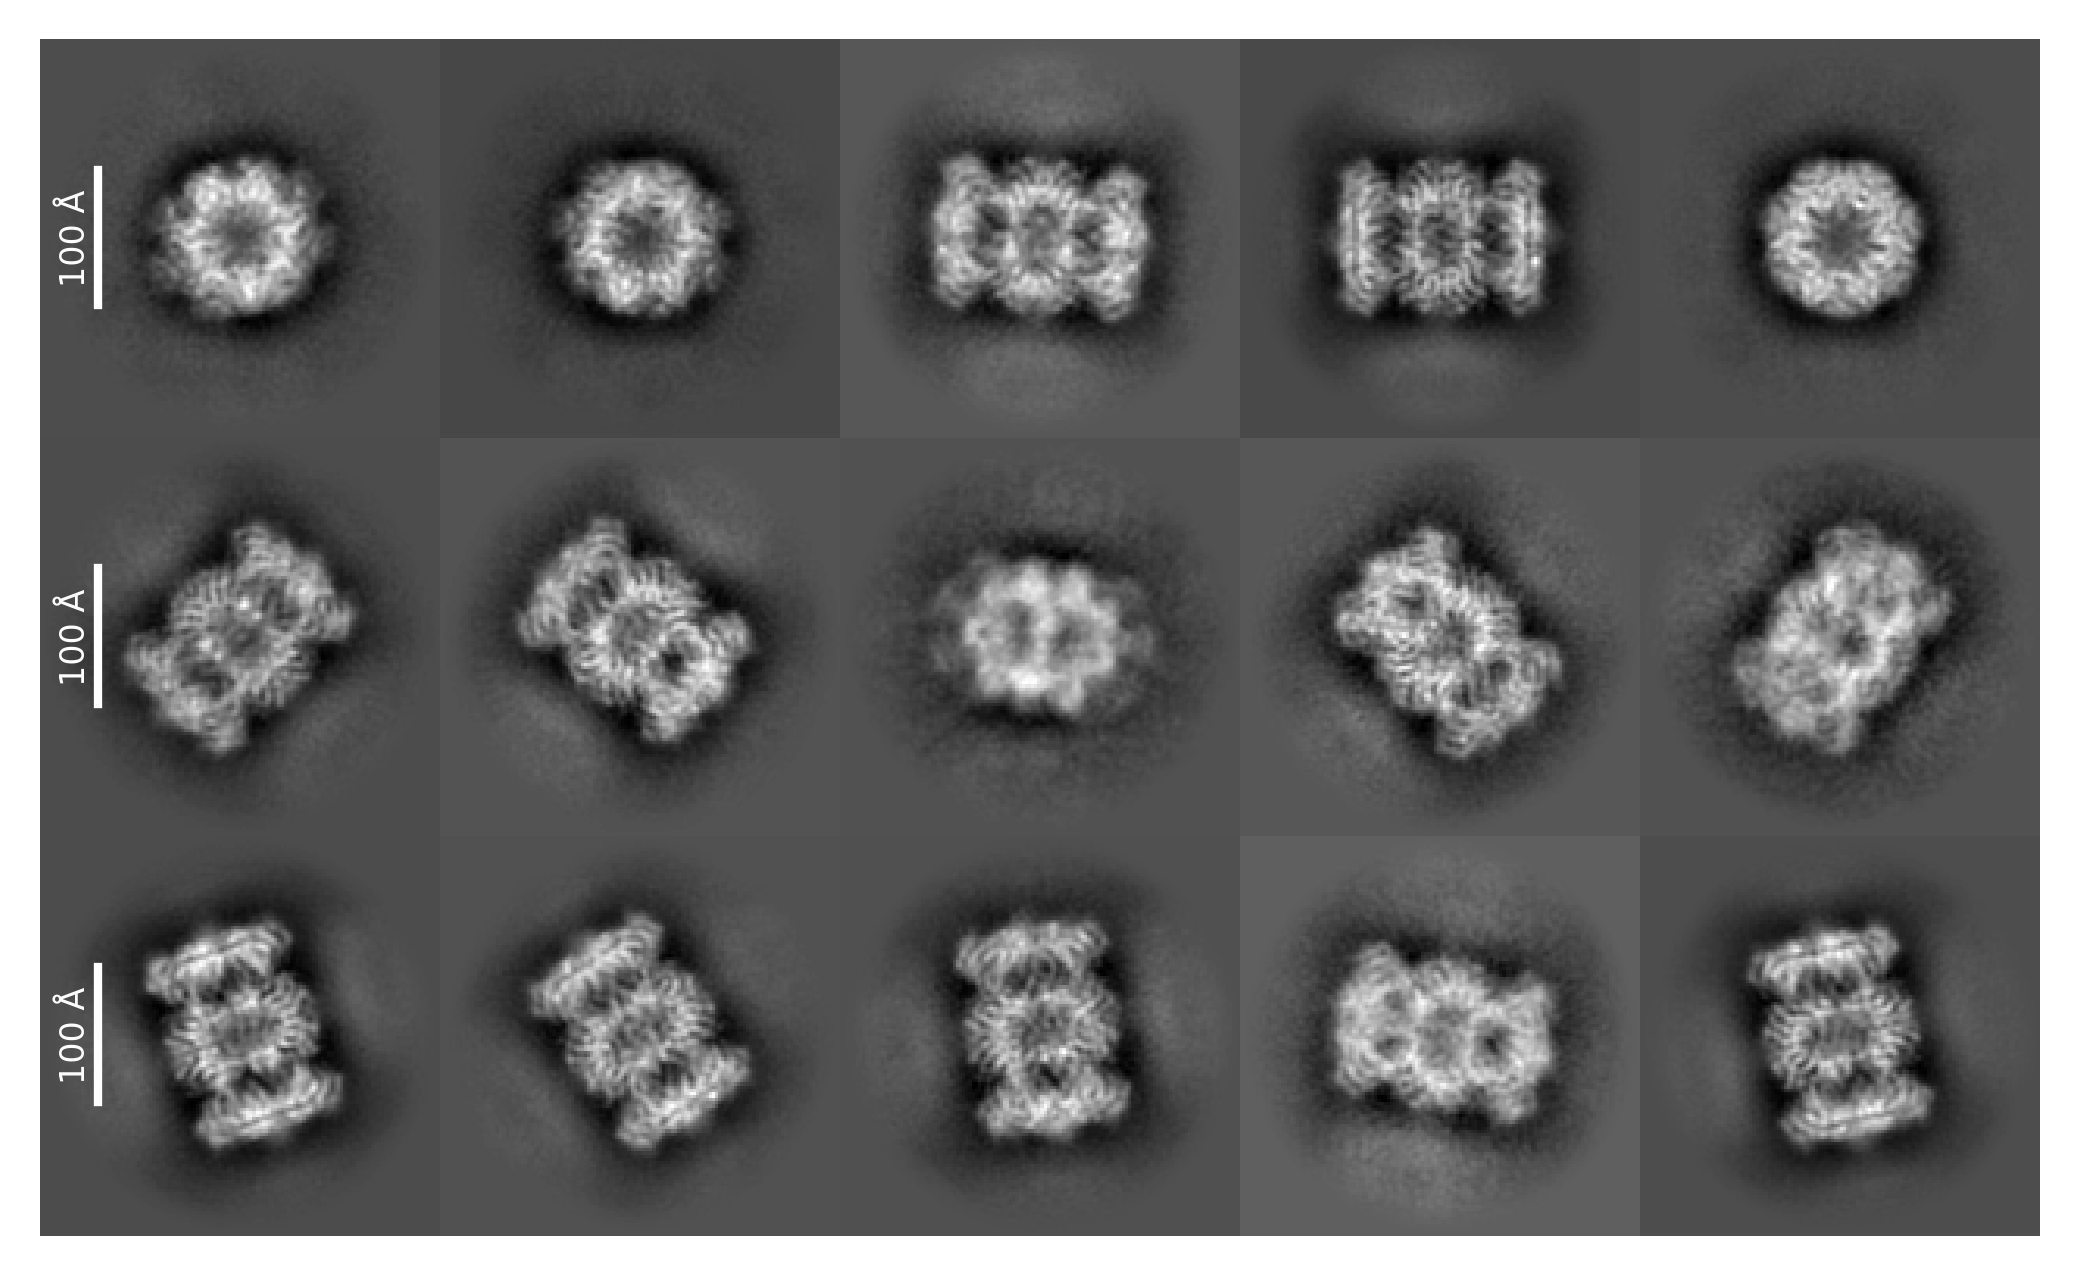

In [29]:
from pathlib import Path
import matplotlib.pyplot as plt

N = templates_selected["blob/shape"][0][0]
scale = 100 / templates_selected["blob/psize_A"][0]  # 100 Å in pixels
fig, axes = plt.subplots(3, 5, figsize=(5, 3), dpi=400)
plt.margins(x=0, y=0)

def crop_image(image, crop):
    crop = int(crop)
    if crop == 0:
        return image
    return image.copy()[crop:-crop, crop:-crop]


for i, template in enumerate(templates_selected.rows()):
    path = template["blob/path"]
    index = template["blob/idx"]
    blob = all_templates_blobs[path][index]
    blob = crop_image(blob, 0)

    ax = axes[i // 5, i % 5]
    ax.axis("off")
    ax.imshow(blob, cmap="gray", origin="lower")
    if i % 5 > 0:
        continue

    # Plot scale bar
    ax.plot([N // 7, N // 7], [N / 2 + scale / 2, N / 2 - scale / 2], color="white")
    ax.text(
        N // 8,
        N / 2,
        "100 Å",
        rotation=90,
        horizontalalignment="right",
        verticalalignment="center",
        fontsize=6,
        color="white",
    )

fig.tight_layout(pad=0)
fig.savefig(Path.home() / "class2d.png", bbox_inches="tight", pad_inches=0)
fig.savefig(Path.home() / "class2d.pdf", bbox_inches="tight", pad_inches=0)